# Task 15 - Exploring with visuals and conclusions - due 23 August 2022

# Exploring with Visuals
Use `clean_08.csv` and `clean_18.csv` to answer the questions in each cell

In [150]:
# load datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [151]:
df_08=pd.read_csv('../data/clean_08.csv')
df_18=pd.read_csv('../data/clean_18.csv')
df_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


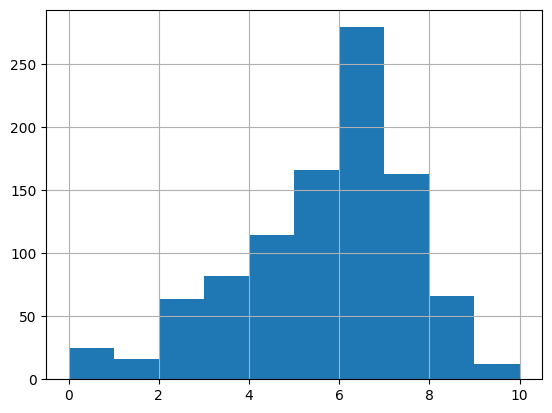

In [152]:
# Compare the distributions of greenhouse gas score in 2008 and 2018: ______
df_08['greenhouse_gas_score'].hist();

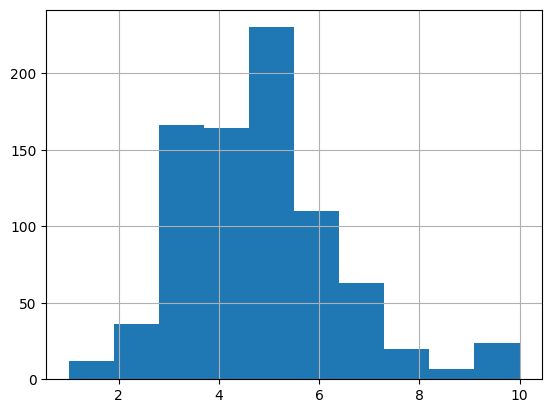

In [153]:

df_18['greenhouse_gas_score'].hist();

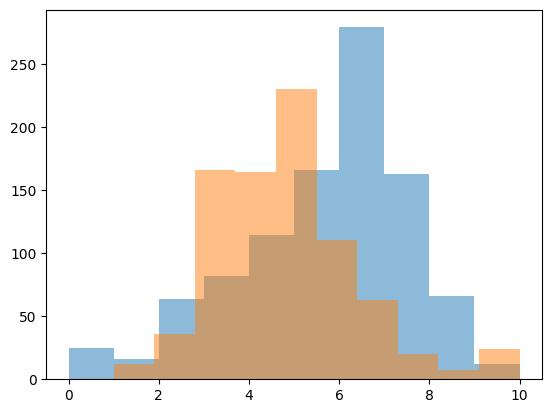

In [154]:
# Can you plot both in a single plot?
plt.hist(df_08['greenhouse_gas_score'], alpha=0.5, label='2008');
plt.hist(df_18['greenhouse_gas_score'], alpha=0.5, label='2018');

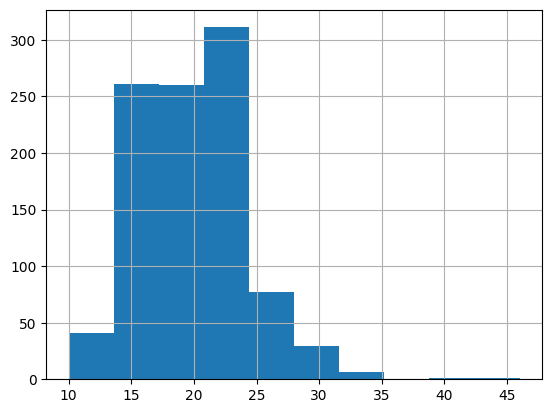

In [155]:
# How has the distribution of combined mpg changed from 2008 to 2018?_______
df_08['cmb_mpg'].hist();


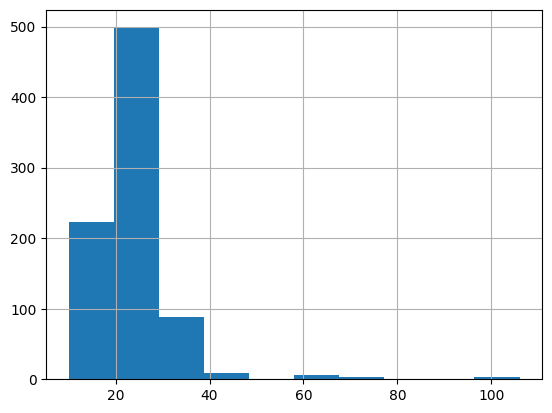

In [156]:
df_18['cmb_mpg'].hist();


<Axes: xlabel='cmb_mpg', ylabel='Density'>

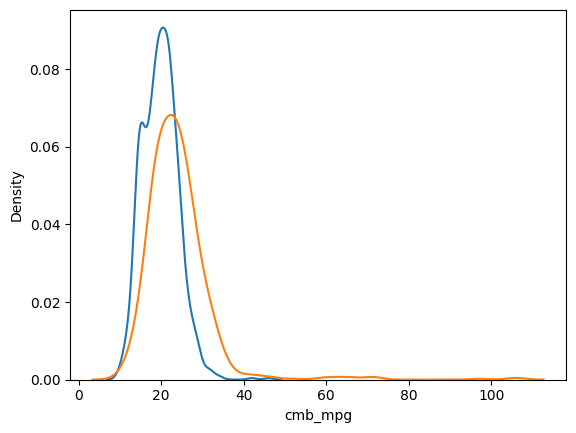

In [157]:

# Stayed the same - became skewed in the opposite direction - Became much more skewed to the right - Moved closer to normal distribution

# You can plot the kde (look it up) to be sure of your answer
import seaborn as sns
sns.kdeplot(df_08['cmb_mpg'], label='2008')
sns.kdeplot(df_18['cmb_mpg'], label='2018')

-0.8187986571997925


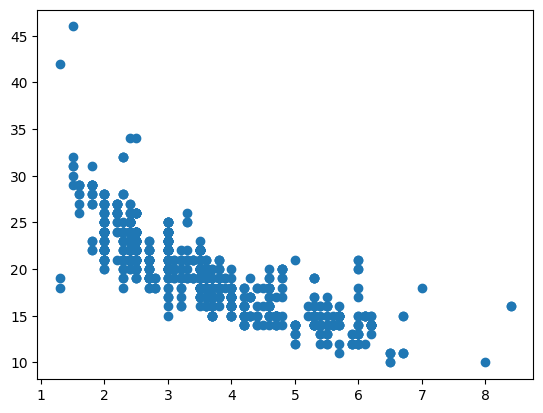

In [158]:
# Choose the correlation between engine displacement and combined mpg? Negative
# Positive correlation - (((Negative))) - None

plt.scatter(df_08['displ'],df_08['cmb_mpg'])
print(df_08['displ'].corr(df_08['cmb_mpg']))

0.947606982725994


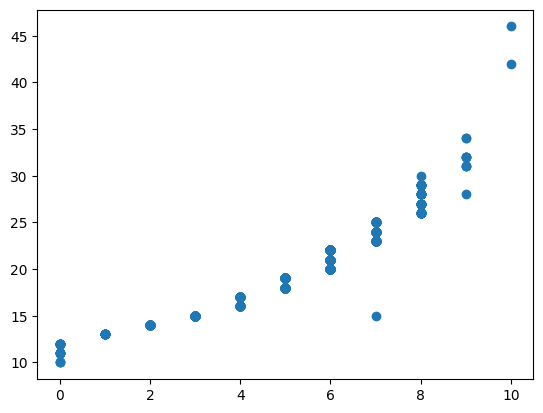

In [159]:
# Choose the correlation between greenhouse gas score and combined mpg? Positive
# Positive correlation -- Negative - None
plt.scatter(df_08['greenhouse_gas_score'],df_08['cmb_mpg'])
print(df_08['greenhouse_gas_score'].corr(df_08['cmb_mpg']))

# Drawing Conclusions

### Q1: How much have vehicle classes improved in fuel economy in 2018 compared to 2008?  

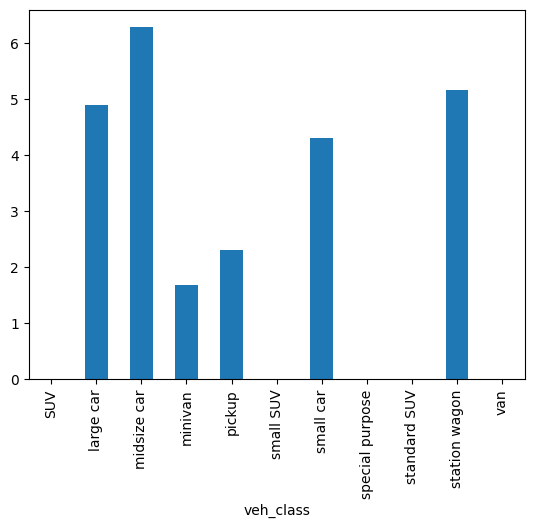

In [160]:
# use plots if you can
mean1=df_08.groupby('veh_class')['cmb_mpg'].mean()
mean2=df_18.groupby('veh_class')['cmb_mpg'].mean()
mean=mean2-mean1
mean.plot(kind='bar');

### Q2: What are the characteristics of SmartWay vehicles? Have they changed over time?
Compare the following features --> drive, cyl, fuel in both datasets. Write your comments and findings in each cell  
Use plots

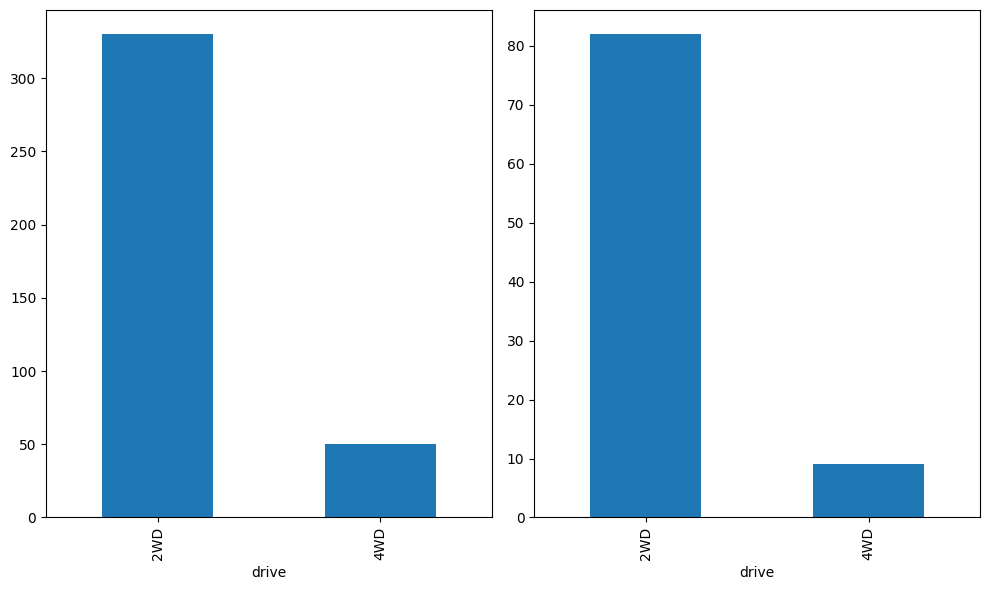

In [161]:
# compare drive
df1_smartway=df_08[df_08['smartway']=='yes']
df2_smartway=df_18[df_18['smartway']=='Yes']
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df1_smartway['drive'].value_counts().plot(kind='bar')
plt.subplot(1, 2, 2) 
df2_smartway['drive'].value_counts().plot(kind='bar')
plt.tight_layout()

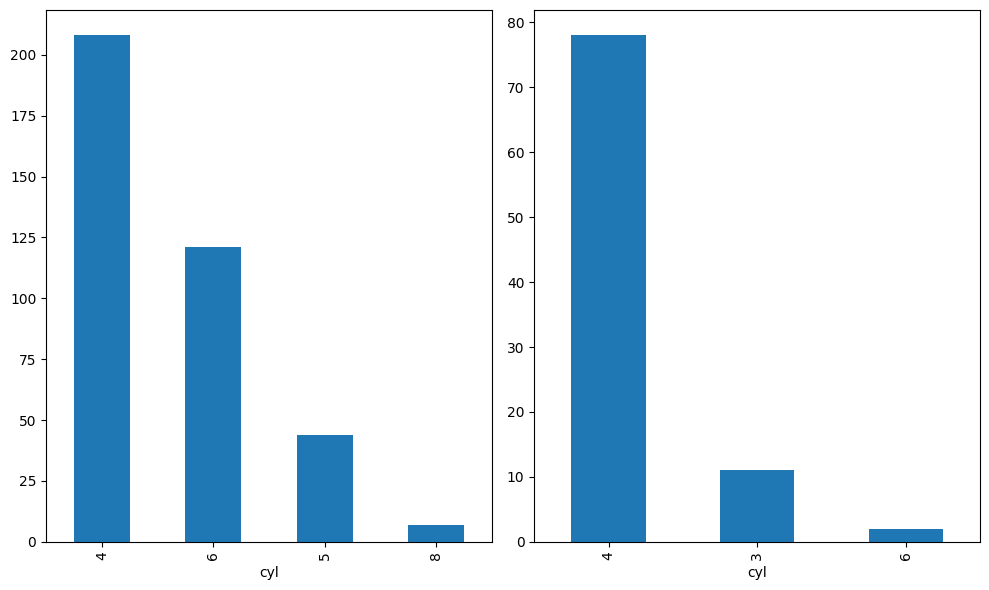

In [162]:
# compare the number of cylinders
# Can you use a pie chart with the percentages shown?

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df1_smartway['cyl'].value_counts().plot(kind='bar')
plt.subplot(1, 2, 2) 
df2_smartway['cyl'].value_counts().plot(kind='bar')
plt.tight_layout()

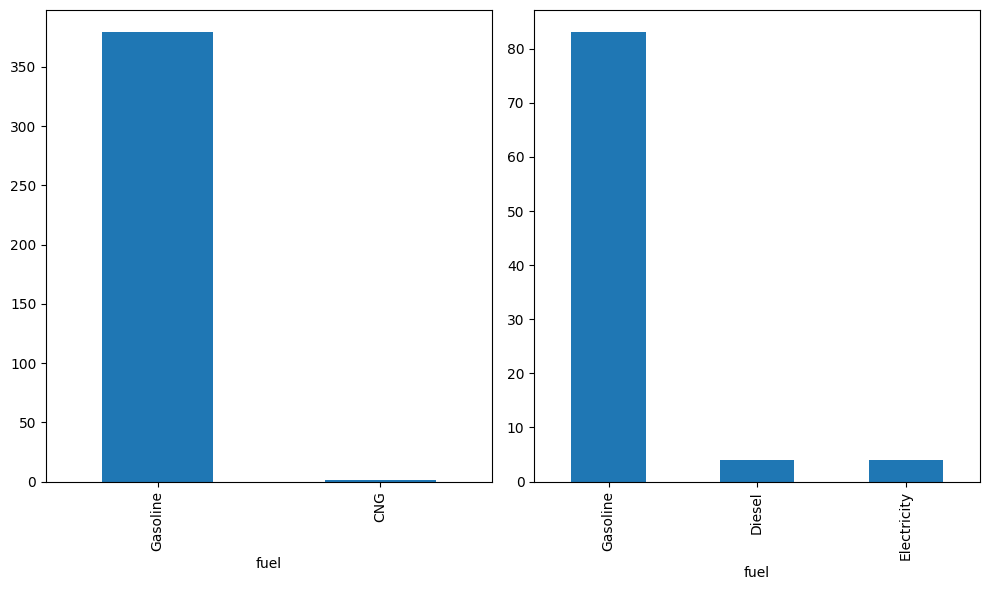

In [163]:
# compare the fuel used
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df1_smartway['fuel'].value_counts().plot(kind='bar')
plt.subplot(1, 2, 2) 
df2_smartway['fuel'].value_counts().plot(kind='bar')
plt.tight_layout()

### Q3: What features (variables) are associated with better fuel economy (positive corr)? ـــــــــــ

Index(['cmb_mpg', 'city_mpg', 'hwy_mpg', 'greenhouse_gas_score',
       'air_pollution_score'],
      dtype='object')


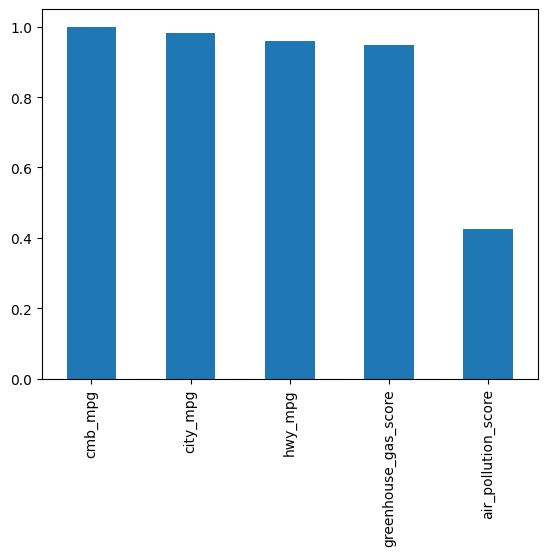

In [164]:
# use plots
numeric_columns = df_08.select_dtypes(include=['float64', 'int64']).columns
best=df_08[numeric_columns].corr()['cmb_mpg'].nlargest(5)
best.plot(kind='bar')
print(best.index)

### Q4: What is the most efficient vehicle class in fuel consumption? ـــــــــــــــــــ

'van'

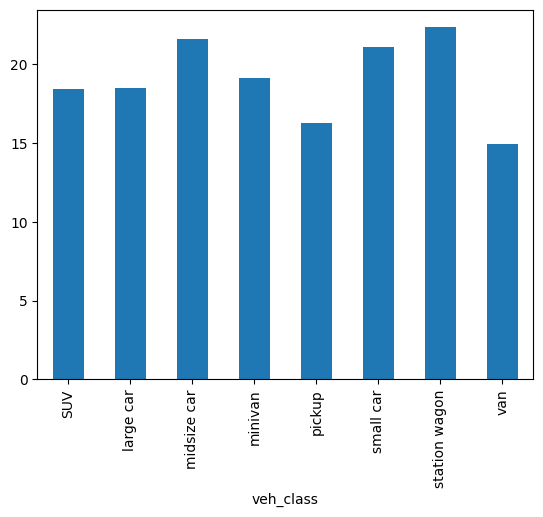

In [165]:
# use plots
avg_fuel_consumption = df_08.groupby('veh_class')['cmb_mpg'].mean()
avg_fuel_consumption.plot(kind='bar')

# Find the most efficient vehicle class with the lowest average fuel consumption
most_efficient_class = avg_fuel_consumption.idxmin()
most_efficient_class

### Q5: Are smartway vehicles associated with better fuel economy? ـــــــــــــــــــ

Text(0, 0.5, 'Average Fuel Economy (MPG)')

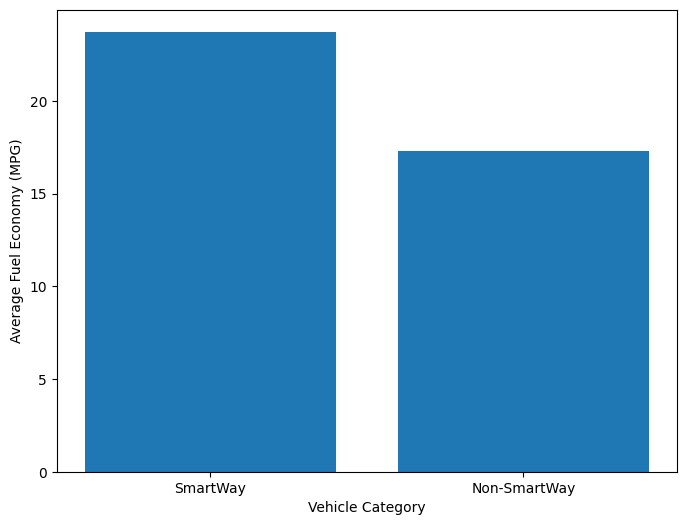

In [166]:
# use plots
smartway_vehicles = df_08[df_08['smartway'] == 'yes']
non_smartway_vehicles = df_08[df_08['smartway'] == 'no']
# Calculate the average fuel economy for SmartWay and non-SmartWay vehicles
avg_fuel_economy_smartway = smartway_vehicles['cmb_mpg'].mean()
avg_fuel_economy_non_smartway = non_smartway_vehicles['cmb_mpg'].mean()
plt.figure(figsize=(8, 6))
plt.bar(['SmartWay', 'Non-SmartWay'], [avg_fuel_economy_smartway, avg_fuel_economy_non_smartway])
plt.xlabel('Vehicle Category')
plt.ylabel('Average Fuel Economy (MPG)')

### Q6: For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?
This is a question regarding models that were updated since 2008 and still being produced in 2018. In order to do this, we need a way to compare models that exist in both datasets. You need to learn how to [merge](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) dataframes

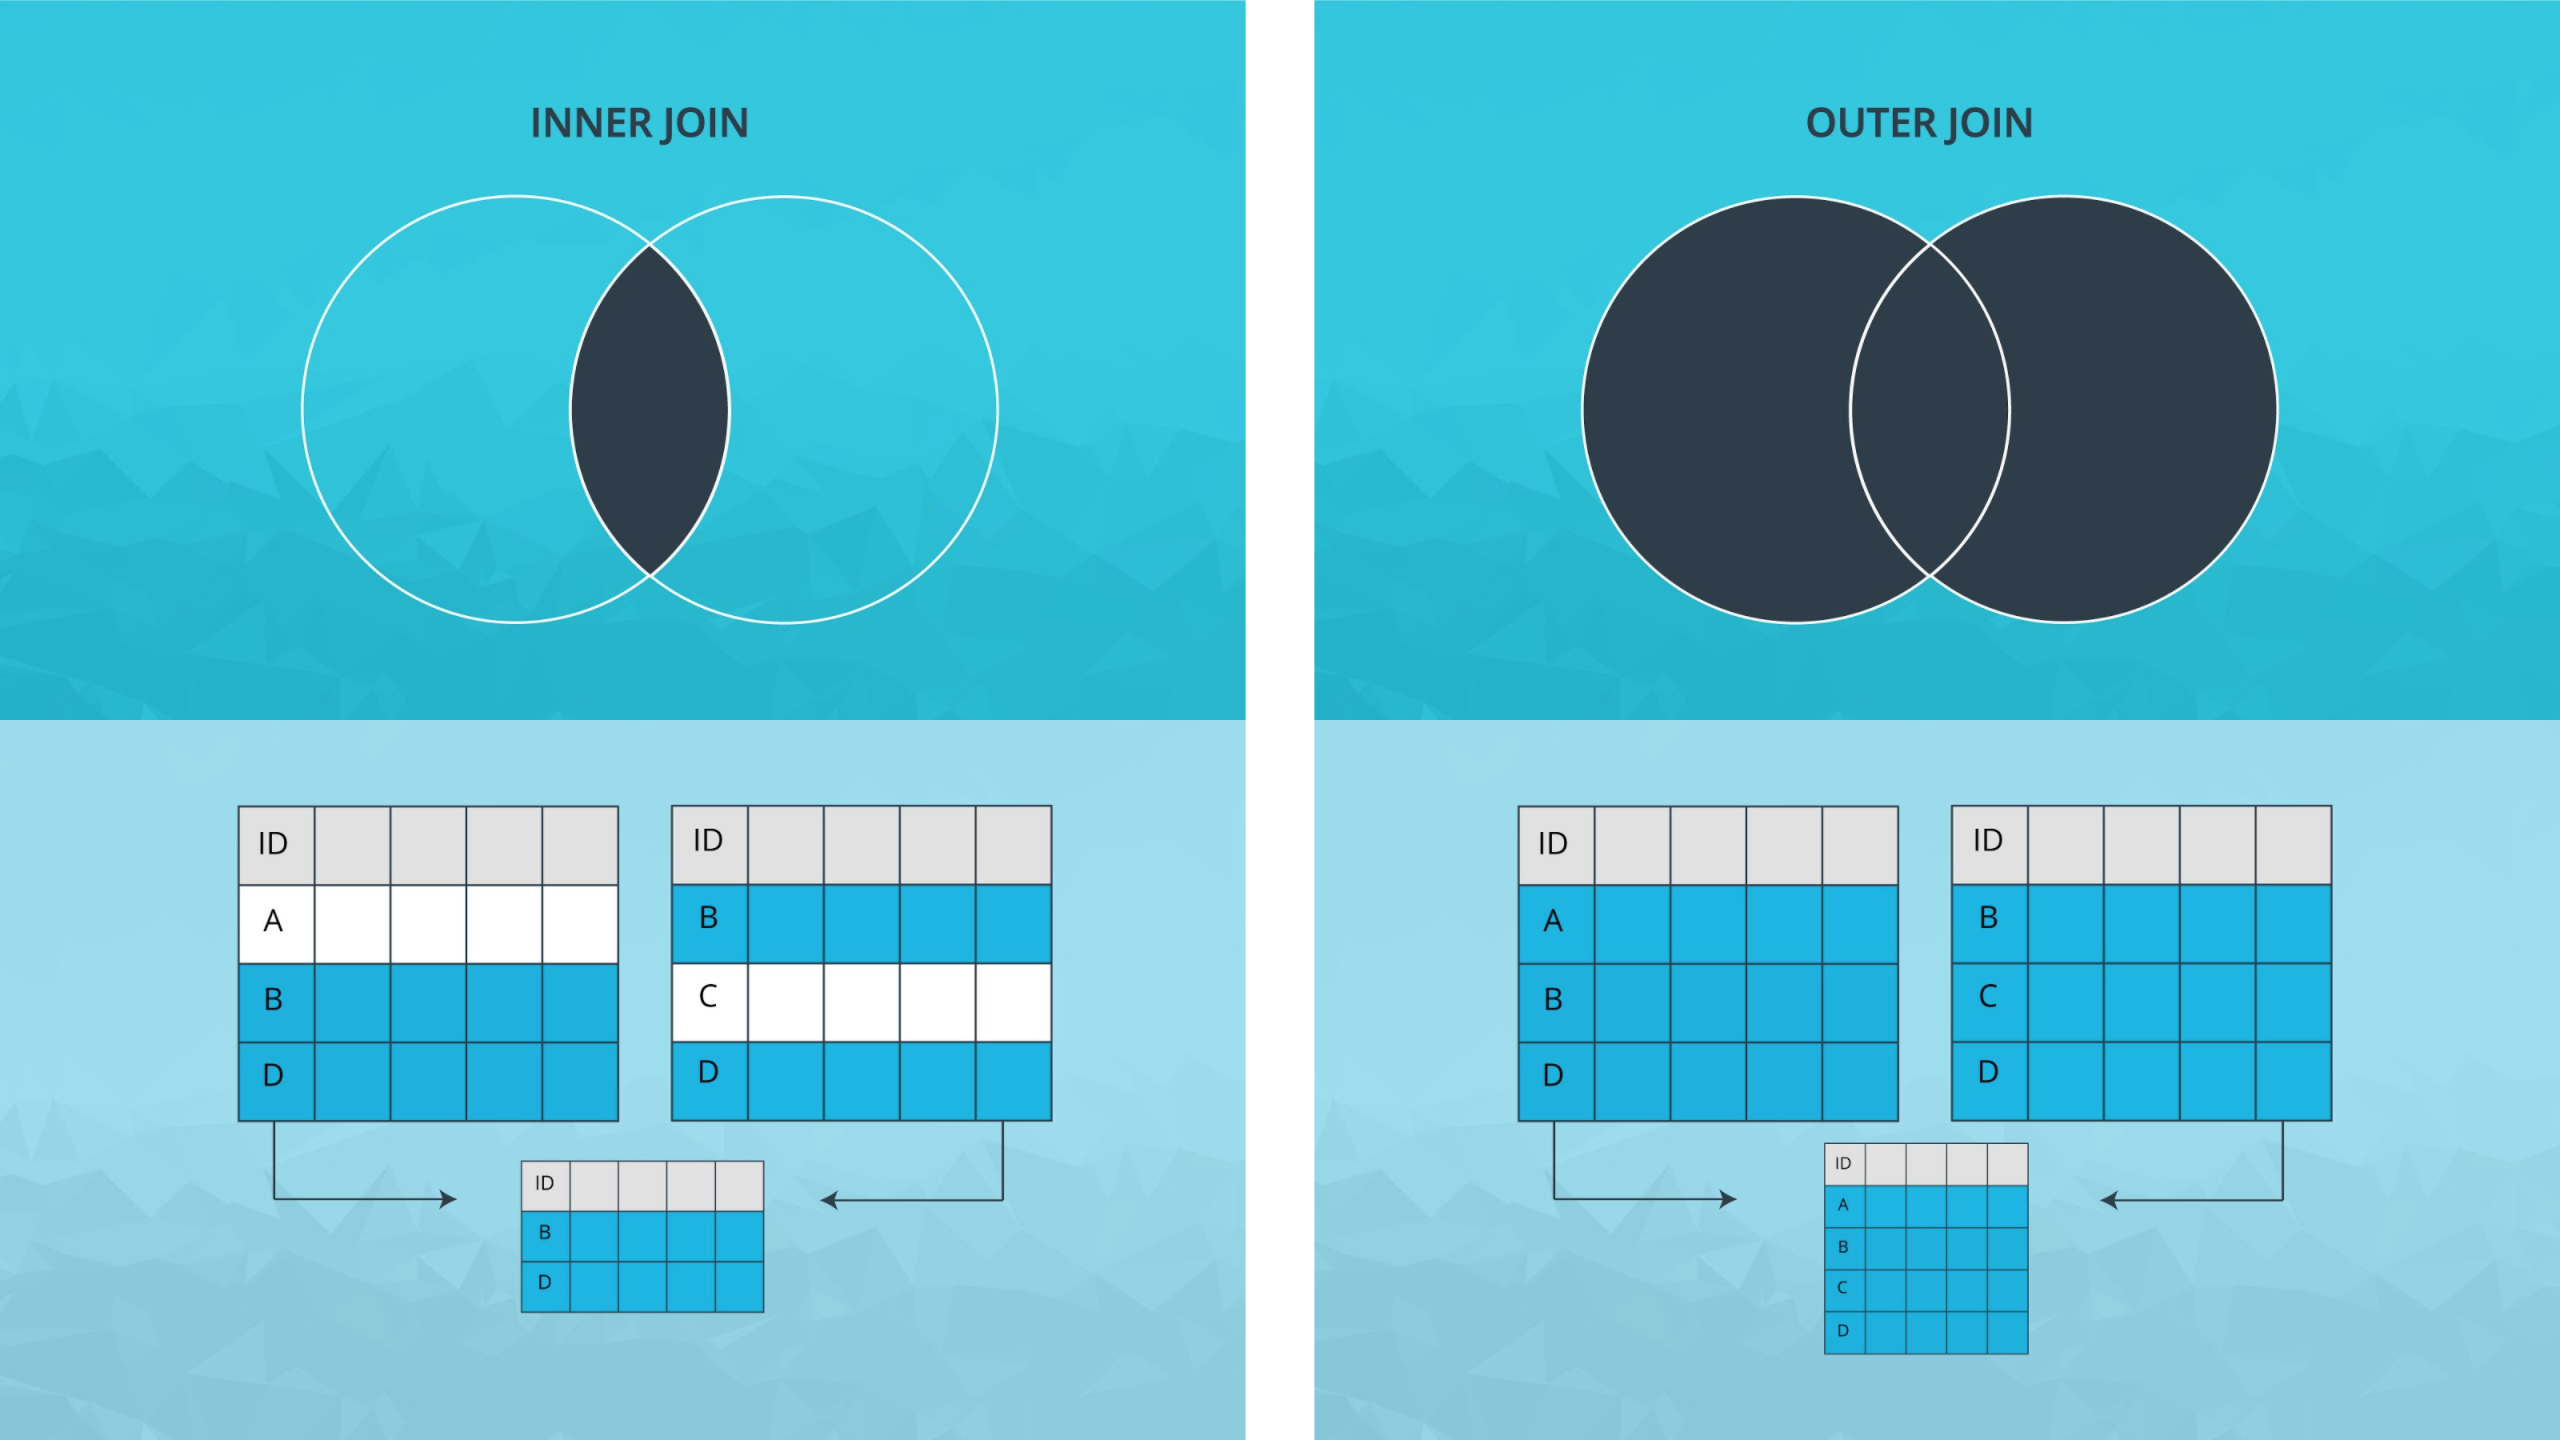

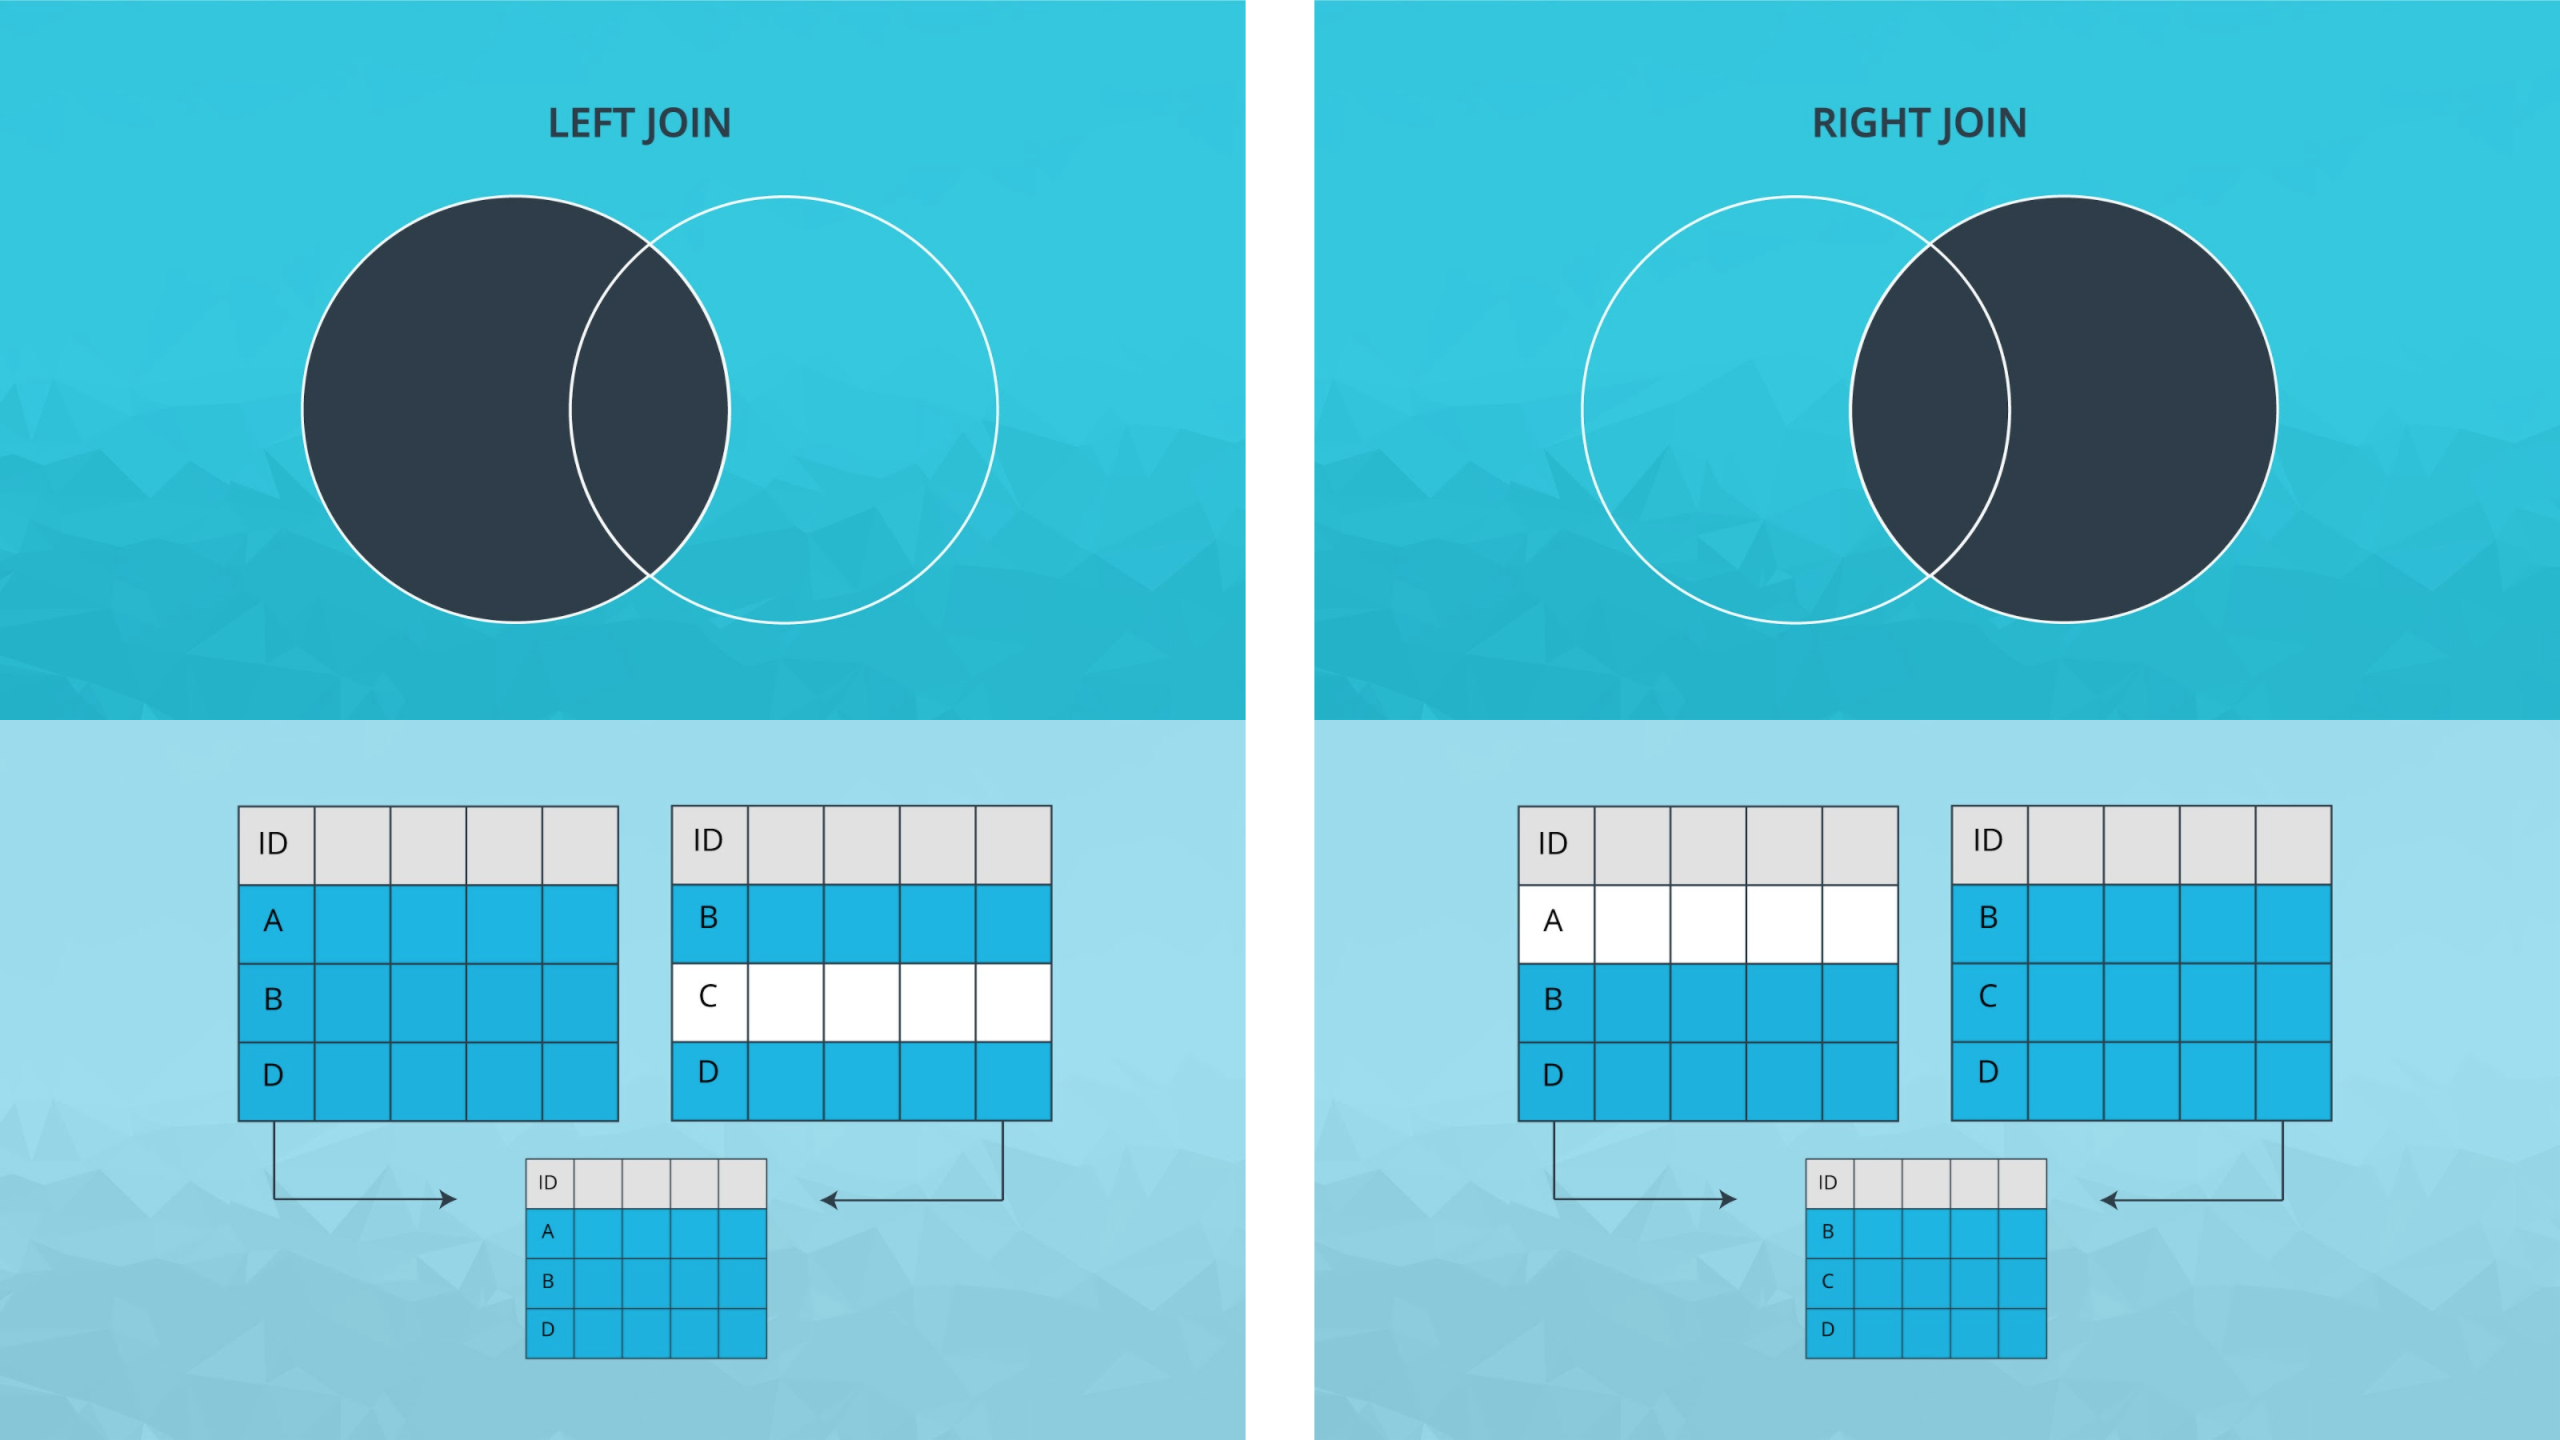

## Merging Datasets
Rename 2008 columns to distinguish from 2018 columns after the merge. 
To do this, take the first 10 characters of the column label and and concatenate it with _2008. (Only take the first 10 characters to prevent really long column names.)

In [167]:
# rename 2008 columns only
df_08.rename(columns=lambda x: x[:10]+'_2008',inplace=True)
df_08.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [168]:
# merge datasets


df=pd.merge(df_08,df_18,left_index=True, right_index=True)


In [169]:
# view to check merge
df.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,...,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,No
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,...,SemiAuto-9,2WD,Gasoline,small car,3.0,20.0,32.0,24.0,5,No
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,...,SemiAuto-9,4WD,Gasoline,small car,3.0,21.0,30.0,24.0,5,No


In [170]:
# How many columns are there after the merge?____ reach me if this number is not 26
df.shape

(832, 26)

In [171]:
# save the combined dataset as 'combined_dataset.csv'
df.to_csv('../data/combined_dataset.csv')

# Results with Merged Dataset

### 1. Create a new dataframe, `model_mpg`, that contain the mean combined mpg values in 2008 and 2018 for each unique model

To do this, group by `model` and find the mean `cmb_mpg_2008` and mean `cmb_mpg` for each.

In [172]:
model_mpg=df.groupby('model').agg({'cmb_mpg_2008': 'mean', 'cmb_mpg': 'mean'})
model_mpg.head()

,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,18.0,22.5
ACURA TLX,20.0,25.0
ACURA TLX AWD A-SPEC,21.0,23.0
ACURA TLX FWD A-SPEC,22.0,23.0
ALFA ROMEO 4C,23.0,28.0


### 2. Create a new column, `mpg_change`, with the change in mean mpg

In [173]:
model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']

### 3. Find the vehicle that improved the most
Can you do this using a single method ?

In [174]:
most_improved_vehicle = df.loc[df['cmb_mpg'].idxmax(), 'model']
most_improved_vehicle

'CHEVROLET Volt'

# Your AI head can't tell what car to buy!!
Omar lives in a city and wants to buy a car. He likes it to be mid size with 6 gears manual transimission. He also cares about fuel consumption.  
Suggest two cars: one that is two wheel drive and the other is four wheel drive (use the 2018 dataset)  
It better not be expensive :)

In [175]:
df_18['trans'][10:20]

10    AMS-7
11    AMS-6
12    AMS-7
13    AMS-7
14    Man-6
15    AMS-7
16    AMS-7
17    Man-6
18    AMS-7
19    AMS-7
Name: trans, dtype: object

In [176]:
filtered_df = df_18[(df_18['veh_class'] == 'midsize car') & (df_18['trans'] == 'Man-6')]

sorted_df = filtered_df.sort_values('cmb_mpg')
# Two-Wheel Drive (2WD) Car
two_wheel_drive_car = sorted_df[sorted_df['drive'] == '2WD'].iloc[0]

# Four-Wheel Drive (4WD) Car
four_wheel_drive_car = sorted_df[sorted_df['drive'] == '4WD'].iloc[0]

print("Two-Wheel Drive (2WD) Car:")
print(two_wheel_drive_car)
print('*'*50)
print("Four-Wheel Drive (4WD) Car:")
print(four_wheel_drive_car)

Two-Wheel Drive (2WD) Car:
model                   DODGE Challenger SRT
displ                                    6.2
cyl                                        8
trans                                  Man-6
drive                                    2WD
fuel                                Gasoline
veh_class                        midsize car
air_pollution_score                      1.0
city_mpg                                13.0
hwy_mpg                                 21.0
cmb_mpg                                 16.0
greenhouse_gas_score                       2
smartway                                  No
Name: 225, dtype: object
**************************************************
Four-Wheel Drive (4WD) Car:
model                   MINI John Cooper Works Clubman All4
displ                                                   2.0
cyl                                                       4
trans                                                 Man-6
drive                                       

# What are your findings ?
### Write a detailed paragraph to describe your findings.
This is a very important question, if you do not answer this in detail, this task is considered not submitted and will not be graded

In summary, based on the given criteria, the DODGE Challenger SRT   and   MINI John Cooper Works Clubman All4  are suggested as potential options for Omar. It is recommended for Omar to further research and consider his budget, additional preferences, test drive the vehicles, and consult local dealerships for the most accurate and up-to-date information before making a final decision.